In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

In [103]:
INPUT_DIR = '../output'
OUTPUT_DIR = '../output'

os.makedirs(OUTPUT_DIR, exist_ok=True)

In [137]:
log_df1 = pd.read_csv('../output/cart_log.csv', 
                     dtype={ 'value_1': str }, 
                     parse_dates=['date'])

In [138]:
# log_df[log_df.date>]
log_df = log_df1.iloc[5630000: 6102000].copy()


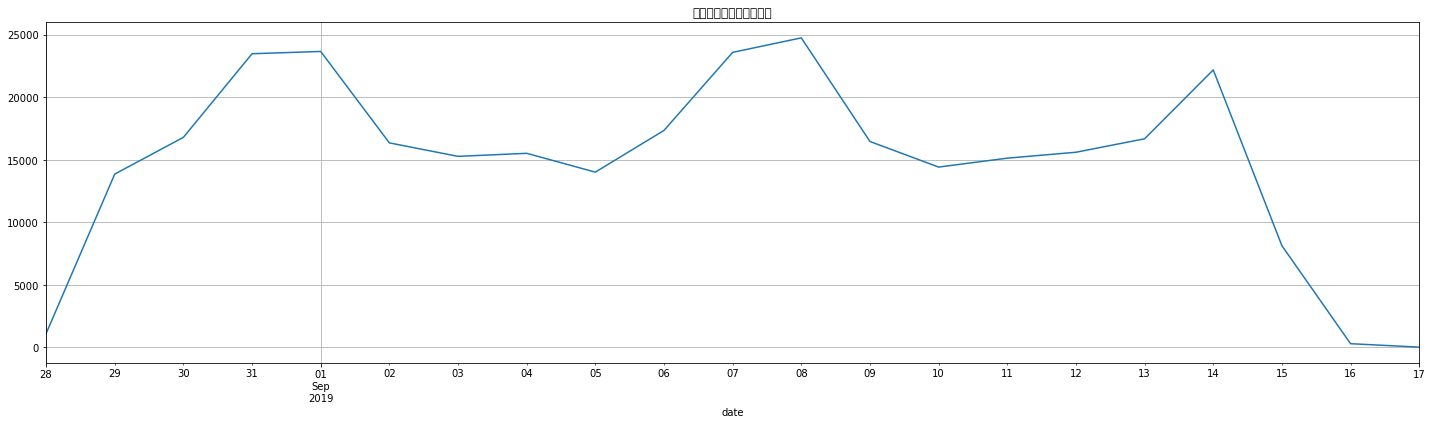

In [139]:
fig, ax = plt.subplots(figsize=(20, 6))
log_df.groupby('date')['n_items'].sum().plot(ax=ax)
ax.grid()
ax.set_title('日毎の購入個数合計推移')
fig.tight_layout()

In [140]:
def filter_payment_logs(log_df):
    x = log_df.groupby('session_id')['is_payment'].sum()
    payment_sessions = x[x > 0].index
    idx = log_df['session_id'].isin(payment_sessions)
    payment_log_df = log_df[idx].reset_index(drop=True)
    return payment_log_df

payed_log_df = filter_payment_logs(log_df)
date_index = pd.date_range(log_df['date'].min(), log_df['date'].max())


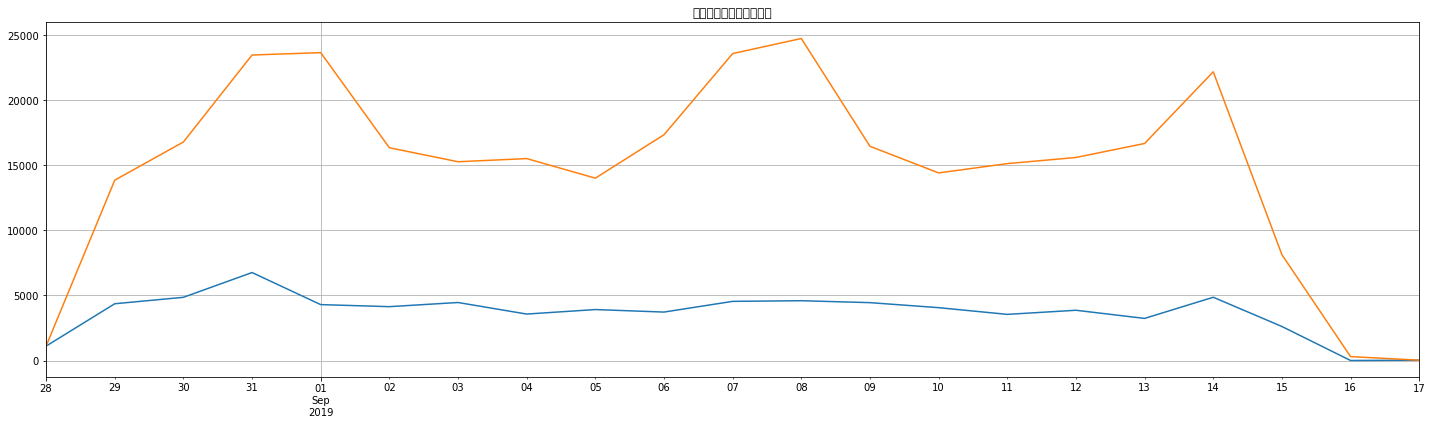

In [141]:
fig, ax = plt.subplots(figsize=(20, 6))
payed_log_df.groupby('date')['n_items'].sum().reindex(date_index).fillna(0).plot(ax=ax)
log_df.groupby('date')['n_items'].sum().reindex(date_index).fillna(0).plot(ax=ax)
ax.grid()
ax.set_title('日毎の購入個数合計推移')
fig.tight_layout()

In [142]:
pay = list(log_df[log_df.is_payment==1].session_id.unique())
not_pay_df = log_df[~log_df.session_id.isin(pay)]
len(not_pay_df[not_pay_df.name_1=='レジ袋'].session_id.unique())

9191

In [143]:
len(log_df.session_id.unique())

19622

In [144]:
ids = list(not_pay_df.session_id.unique())
log_df = log_df1
log_df.loc[(log_df.session_id.isin(ids)) & (log_df.name_1=='レジ袋'), 'is_payment'] = 1




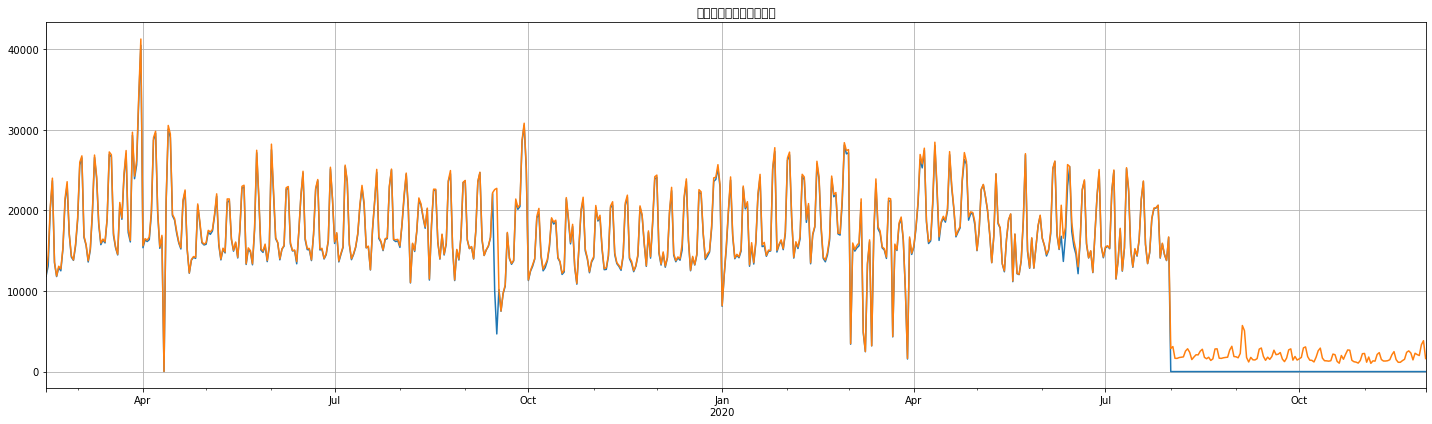

In [145]:
payed_log_df = filter_payment_logs(log_df)
date_index = pd.date_range(log_df['date'].min(), log_df['date'].max())

fig, ax = plt.subplots(figsize=(20, 6))
payed_log_df.groupby('date')['n_items'].sum().reindex(date_index).fillna(0).plot(ax=ax)
log_df.groupby('date')['n_items'].sum().reindex(date_index).fillna(0).plot(ax=ax)
ax.grid()
ax.set_title('日毎の購入個数合計推移')
fig.tight_layout()

In [146]:
log_df.to_csv('../output/cart_log_re.csv')

In [149]:
del log_df

In [150]:
log_df = pd.read_csv('../output/cart_log_re.csv', 
                     dtype={ 'value_1': str }, 
                     parse_dates=['date'])

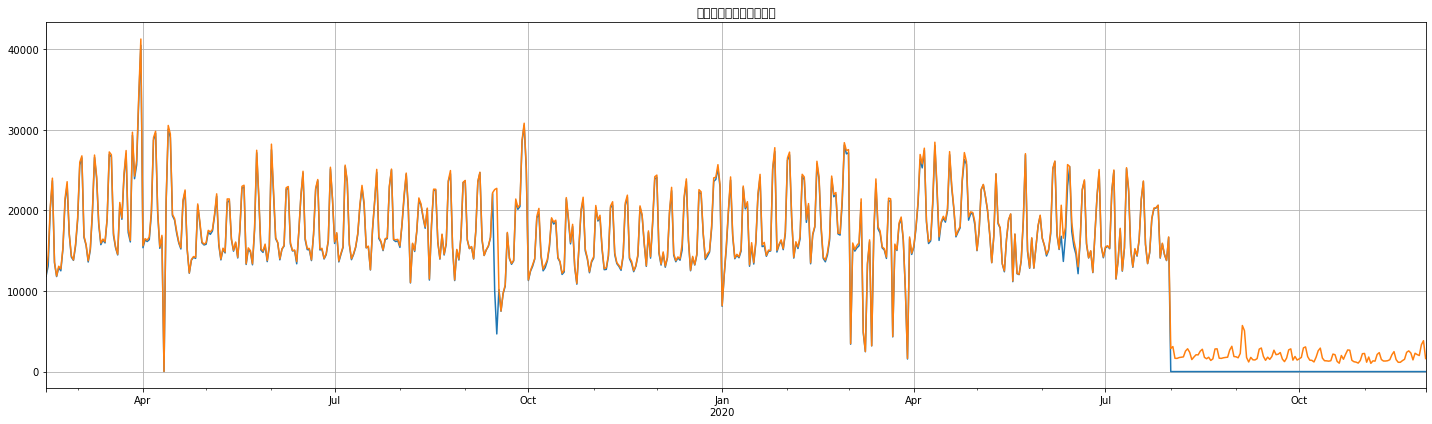

In [151]:
payed_log_df = filter_payment_logs(log_df)
date_index = pd.date_range(log_df['date'].min(), log_df['date'].max())

fig, ax = plt.subplots(figsize=(20, 6))
payed_log_df.groupby('date')['n_items'].sum().reindex(date_index).fillna(0).plot(ax=ax)
log_df.groupby('date')['n_items'].sum().reindex(date_index).fillna(0).plot(ax=ax)
ax.grid()
ax.set_title('日毎の購入個数合計推移')
fig.tight_layout()